<a href="https://colab.research.google.com/github/khodozzz/neural-networks-tasks/blob/main/5_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils
import numpy as np

In [ ]:
batch_size = 32  # in each iteration, we consider 32 training examples at once
num_epochs = 200  # we iterate 200 times over the entire training set
kernel_size = 3  # we will use 3x3 kernels throughout
kernel_size_1 = 2  # we will use 2x2 kernels throughout
kernel_size_2 = 4  # we will use 4x4 kernels throughout
pool_size = 2  # we will use 2x2 pooling throughout
conv_depth_1 = 32  # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64  # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25  # dropout after pooling with probability 0.25
drop_prob_2 = 0.5  # dropout in the dense layer with probability 0.5
hidden_size = 512  # the dense layer will have 512 neurons

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


[3]


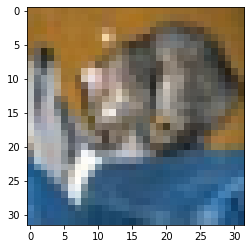

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0])
print(y_test[0])

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data

num_train, depth, height, width = X_train.shape # there are 50000 training examples in CIFAR-10
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_train) # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

In [ ]:
inp = Input(shape=(depth, height, width))  # N.B. depth goes first in Keras

# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size, padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size), padding='same')(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)

# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, kernel_size, kernel_size, padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, kernel_size, padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size), padding='same')(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)

# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model = Model(inputs=inp, outputs=out)  # To define a model, just specify its input and output layers

model.compile(loss='categorical_crossentropy',  # using the cross-entropy loss function
              optimizer='adam',  # using the Adam optimiser
              metrics=['accuracy'])  # reporting the accuracy

model.fit(X_train, Y_train,  # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1)  # ...holding out 10% of the data for validation

Epoch 1/200
1407/1407 [==============================] - 6s 4ms/step - loss: 2.0443 - accuracy: 0.2153 - val_loss: 1.6790 - val_accuracy: 0.3692
Epoch 2/200
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7008 - accuracy: 0.3692 - val_loss: 1.5404 - val_accuracy: 0.4276
Epoch 3/200
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6192 - accuracy: 0.3949 - val_loss: 1.4601 - val_accuracy: 0.4592
Epoch 4/200
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5545 - accuracy: 0.4259 - val_loss: 1.4286 - val_accuracy: 0.4776
Epoch 5/200
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5204 - accuracy: 0.4386 - val_loss: 1.3953 - val_accuracy: 0.4886
Epoch 6/200
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5065 - accuracy: 0.4497 - val_loss: 1.4029 - val_accuracy: 0.4814
Epoch 7/200
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4754 - accuracy: 0.4630 - val_loss: 1.3612 - val_ac

In [ ]:
inp = Input(shape=(depth, height, width))  # N.B. depth goes first in Keras

# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size, padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size), padding='same')(conv_2)

# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, kernel_size, kernel_size, padding='same', activation='relu')(pool_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, kernel_size, padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size), padding='same')(conv_4)

# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax
flat = Flatten()(pool_2)
hidden = Dense(hidden_size, activation='relu')(flat)
out = Dense(num_classes, activation='softmax')(hidden)

model = Model(inputs=inp, outputs=out)  # To define a model, just specify its input and output layers

model.compile(loss='categorical_crossentropy',  # using the cross-entropy loss function
              optimizer='adam',  # using the Adam optimiser
              metrics=['accuracy'])  # reporting the accuracy

model.fit(X_train, Y_train,  # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1)  # ...holding out 10% of the data for validation

Epoch 1/200
1407/1407 [==============================] - 6s 4ms/step - loss: 1.9715 - accuracy: 0.2547 - val_loss: 1.6016 - val_accuracy: 0.3994
Epoch 2/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5928 - accuracy: 0.4019 - val_loss: 1.5126 - val_accuracy: 0.4450
Epoch 3/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.4629 - accuracy: 0.4560 - val_loss: 1.4534 - val_accuracy: 0.4664
Epoch 4/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3909 - accuracy: 0.4866 - val_loss: 1.3915 - val_accuracy: 0.4952
Epoch 5/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3442 - accuracy: 0.5078 - val_loss: 1.3292 - val_accuracy: 0.5200
Epoch 6/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3034 - accuracy: 0.5255 - val_loss: 1.3472 - val_accuracy: 0.5050
Epoch 7/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2753 - accuracy: 0.5341 - val_loss: 1.2814 - val_ac

In [ ]:
inp = Input(shape=(depth, height, width))  # N.B. depth goes first in Keras

# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, kernel_size_1, kernel_size_1, padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size_1, kernel_size_1, padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size), padding='same')(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)

# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, kernel_size_1, kernel_size_1, padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size_1, kernel_size_1, padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size), padding='same')(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)

# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model = Model(inputs=inp, outputs=out)  # To define a model, just specify its input and output layers

model.compile(loss='categorical_crossentropy',  # using the cross-entropy loss function
              optimizer='adam',  # using the Adam optimiser
              metrics=['accuracy'])  # reporting the accuracy

model.fit(X_train, Y_train,  # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1)  # ...holding out 10% of the data for validation

Epoch 1/200
1407/1407 [==============================] - 40s 7ms/step - loss: 1.9706 - accuracy: 0.2479 - val_loss: 1.4769 - val_accuracy: 0.4504
Epoch 2/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5439 - accuracy: 0.4292 - val_loss: 1.3321 - val_accuracy: 0.5126
Epoch 3/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4465 - accuracy: 0.4714 - val_loss: 1.2590 - val_accuracy: 0.5394
Epoch 4/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3739 - accuracy: 0.4972 - val_loss: 1.2396 - val_accuracy: 0.5494
Epoch 5/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3409 - accuracy: 0.5162 - val_loss: 1.1754 - val_accuracy: 0.5722
Epoch 6/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3062 - accuracy: 0.5295 - val_loss: 1.1562 - val_accuracy: 0.5846
Epoch 7/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2796 - accuracy: 0.5426 - val_loss: 1.1169 -

In [ ]:
inp = Input(shape=(depth, height, width))  # N.B. depth goes first in Keras

# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, kernel_size_2, kernel_size_2, padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size_2, kernel_size_2, padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size), padding='same')(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)

# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, kernel_size_2, kernel_size_2, padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size_2, kernel_size_2, padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size), padding='same')(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)

# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model = Model(inputs=inp, outputs=out)  # To define a model, just specify its input and output layers

model.compile(loss='categorical_crossentropy',  # using the cross-entropy loss function
              optimizer='adam',  # using the Adam optimiser
              metrics=['accuracy'])  # reporting the accuracy

model.fit(X_train, Y_train,  # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1)  # ...holding out 10% of the data for validation

Epoch 1/200
1407/1407 [==============================] - 10s 6ms/step - loss: 2.1491 - accuracy: 0.1685 - val_loss: 1.8957 - val_accuracy: 0.2606
Epoch 2/200
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9235 - accuracy: 0.2538 - val_loss: 1.8075 - val_accuracy: 0.3074
Epoch 3/200
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8454 - accuracy: 0.2872 - val_loss: 1.7012 - val_accuracy: 0.3548
Epoch 4/200
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7775 - accuracy: 0.3195 - val_loss: 1.6554 - val_accuracy: 0.3734
Epoch 5/200
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7380 - accuracy: 0.3385 - val_loss: 1.6153 - val_accuracy: 0.3952
Epoch 6/200
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7112 - accuracy: 0.3499 - val_loss: 1.6021 - val_accuracy: 0.4008
Epoch 7/200
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6816 - accuracy: 0.3693 - val_loss: 1.5721 - val_a